In [1]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

(100, 20)


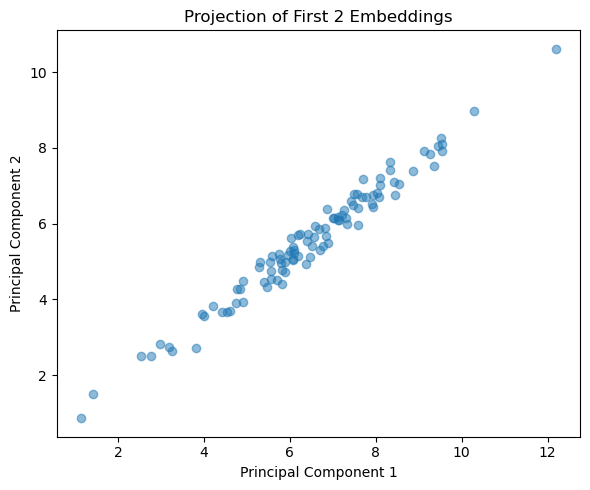

In [16]:
embedding_list = np.load('embedding_list.npy')
embeddings = np.vstack(embedding_list)

print(embeddings.shape)

plt.figure(figsize=(6, 5))
plt.scatter(embeddings[:, 0], embeddings[:, 1], alpha=0.5)
plt.title('Projection of First 2 Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()